In [93]:
import qiskit
from qiskit.circuit.library import MCMT
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [94]:
from qiskit import QuantumCircuit

def grover_oracle(n):
    # # Prepare the ancilla
    # for q in range(n):
    #     qc.h(q)
    # qc.x(n)
    # qc.h(n)
    # for q in range(n+1, n+k):
    #     qc.h(q)
    # qc.append(MCMT('cx', n, k), range(n+k))
    

    # # qc.h(n)
    # # qc.x(n)
    # return qc
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    qc.x(0)
    qc.h(3)
    qc.mcx([0,1,2],3)
    qc.h(3)
    qc.x(0)

    qc.barrier()



In [95]:
def diffuser():
    for i in range(4):
        qc.h(i)
        qc.x(i)
    qc.h(0)
    qc.mcx([1,2,3], 0)
    qc.h(0)
    for i in range(4):
        qc.x(i)
        qc.h(i)
    qc.barrier()

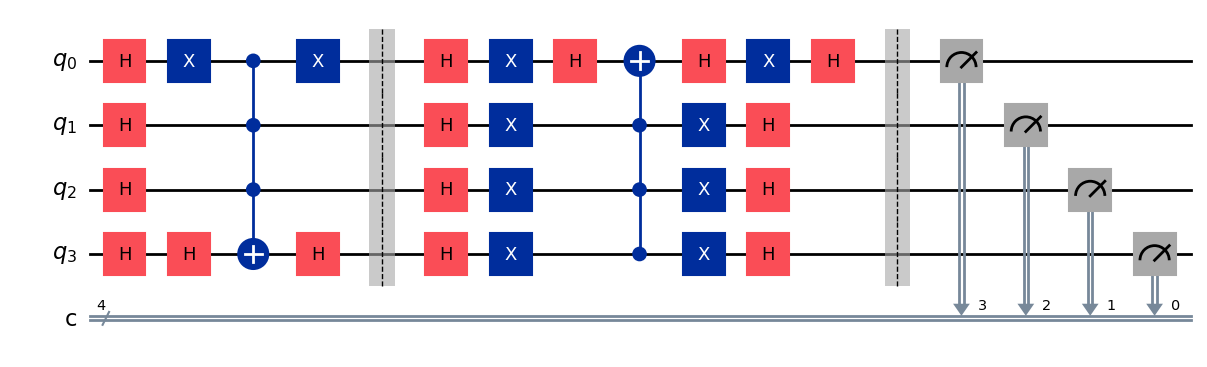

In [96]:
n = 4
k = 0
run = 1
qc = QuantumCircuit(n+k, n)
for i in range(run):
    oracle = grover_oracle(n)
    diffusion = diffuser()

for i in range(n):
    qc.measure(i, n-1-i)  # Measure qubit i and store the result in classical bit i

qc.draw('mpl')


Counts: {'0111': 473, '0001': 39, '1100': 35, '1111': 43, '0010': 40, '0100': 45, '1000': 43, '0000': 31, '0110': 34, '1110': 33, '1001': 24, '0101': 33, '1010': 38, '1011': 48, '0011': 35, '1101': 30}


C:\Users\26550\AppData\Local\Temp\ipykernel_8568\3209862428.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


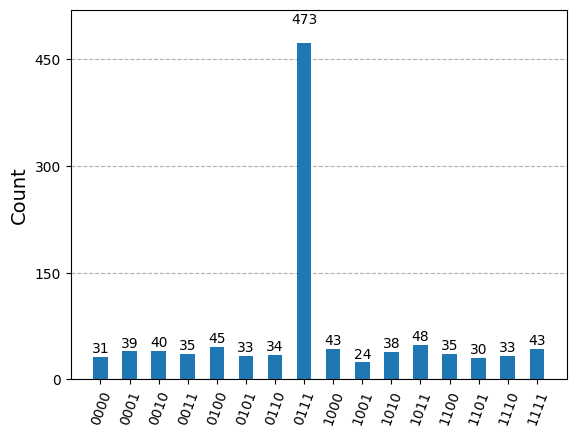

In [97]:

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)
print("Counts:", counts)

# Plot the result
plot_histogram(counts)

In [98]:
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# import numpy as np
# from qiskit.circuit.library import IQP
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# from qiskit.quantum_info import random_hermitian
# from qiskit_ibm_runtime import QiskitRuntimeService
 
# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)


# pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
# isa_circuit = pm.run(qc)

: 